## Decision Tree to Detect Hate Speech
Features used in classification explained with SHAP (https://medium.com/nlplanet/two-minutes-nlp-explain-predictions-with-shap-values-2a0e34219177)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
import numpy as np

from text_preprocess import clean_text

In [2]:
# Load datasets
train_df = pd.read_csv("C:\\Users\\aysen\\Documents\\GitHub\\hate_speech_models\\data\\annotations_metadata_train.csv")
test_df = pd.read_csv("C:\\Users\\aysen\\Documents\\GitHub\\hate_speech_models\\data\\annotations_metadata_test.csv")

# Text preprocessing
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text']  = test_df['text'].apply(clean_text)

train_tokens = [token for tokens_list in train_df['text'] for token in tokens_list]
preprocessed_train_tokens = [token for tokens_list in train_df['cleaned_text'] for token in tokens_list]

vocabulary_size = len(set(train_tokens))
vocabulary_size_preprocessed = len(set(preprocessed_train_tokens))

print(f'Vocabulary Size: {vocabulary_size}')
print(f'Vocabulary Size Preprocessed: {vocabulary_size_preprocessed}')

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

X_train = train_df['cleaned_text']
X_val = val_df['cleaned_text']
X_test = test_df['cleaned_text']

Vocabulary Size: 111
Vocabulary Size Preprocessed: 27


In [3]:
# Text vectorization using CountVectorizer
vectorizer = TfidfVectorizer(max_df=50)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

In [4]:
# Labels
y_train = (train_df['label'] == 'hate').astype(int)
y_val = (val_df['label'] == 'hate').astype(int)
y_test = (test_df['label'] == 'hate').astype(int)

In [5]:
# Hyperparameter tuning
best_accuracy = 0
best_model = None

for max_depth in [None, 5, 10, 15]:
    for min_samples_split in [2, 5, 10]:
        for min_samples_leaf in [1, 2, 4]:
            
            # Decision tree
            tree_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            tree_classifier.fit(X_train_vec, y_train)

            # Evaluate on the validation set
            val_predictions = tree_classifier.predict(X_val_vec)
            val_accuracy = accuracy_score(y_val, val_predictions)

            # Check if the current configuration is the best so far
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = tree_classifier

print(f'Best Max Depth: {best_model.max_depth}')
print(f'Best Min Samples Split: {best_model.min_samples_split}')
print(f'Best Min Samples Leaf: {best_model.min_samples_leaf}')

# Use the best model for evaluation on the test set
test_predictions = best_model.predict(X_test_vec)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'Best Validation Accuracy: {best_accuracy}')
print(f'Test Accuracy with Best Model: {test_accuracy}')

Best Max Depth: None
Best Min Samples Split: 10
Best Min Samples Leaf: 1
Best Validation Accuracy: 0.6736292428198434
Test Accuracy with Best Model: 0.698744769874477


In [19]:
# Create a SHAP explainer for the trained decision tree model
feature_names = vectorizer.get_feature_names_out()
explainer = shap.Explainer(best_model, X_train_vec, feature_names=feature_names)
shap_values = explainer(X_test_vec)
print(shap_values.values.shape) # (478, tdidf_features, 2)

(478, 4945, 2)


hes a retarded feral negro yes feral humans who cannot talk occasionally pop up having been abandoned as children


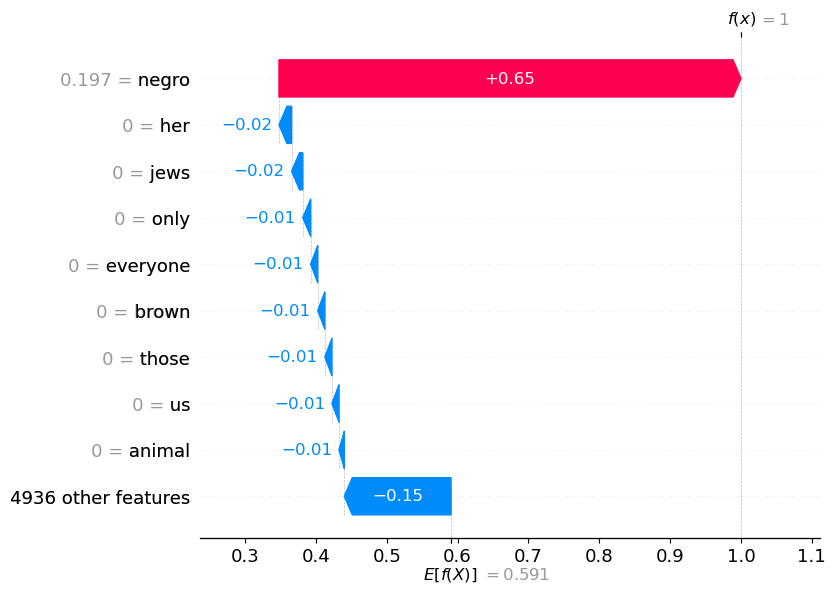

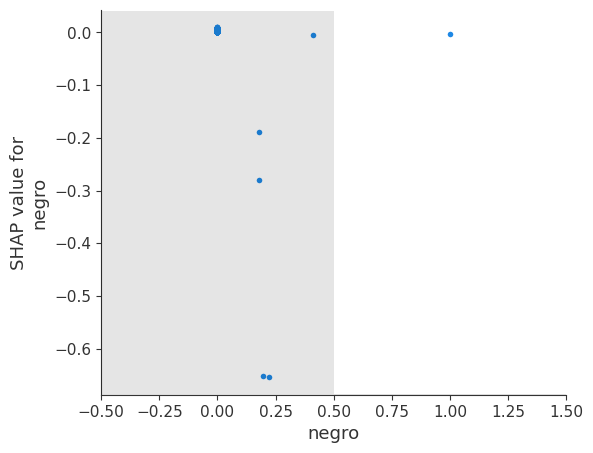

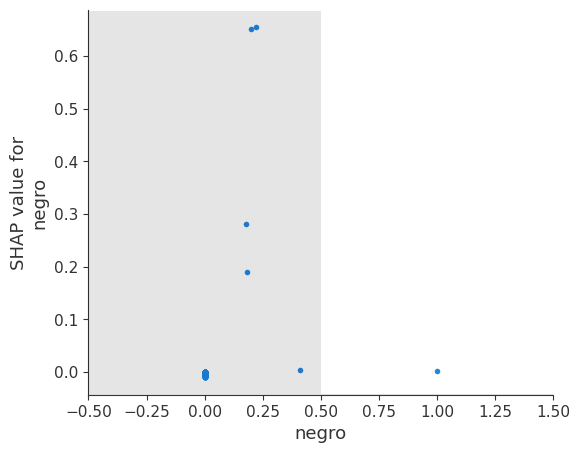

In [21]:
shap.initjs()

# Visualize the SHAP values 
#shap.summary_plot(shap_values, X_test_vec, feature_names=feature_names)

ind = 6
print(X_test[ind])
# hes a retarded feral negro yes feral humans who cannot talk occasionally pop up having been abandoned as children

shap.plots.waterfall(shap_values[ind,:,1])

shap.plots.scatter(shap_values[:,feature_names.tolist().index("negro"), 0])
shap.plots.scatter(shap_values[:,feature_names.tolist().index("negro"), 1])

# TODO Global feature visualization
#shap.plots.force(explainer.expected_value[0:100], shap_values[0:100])

In [22]:
# TODO
# shap.plots.heatmap(shap_values[ind])    # heatmap plot

In [18]:
# TODO
# shap.plots.text(shap_values[ind]) 

AttributeError: 'numpy.float64' object has no attribute 'replace'